# Customer Churn Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

## Load the Dataset

In [35]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

## Exploratory Data Analysis (EDA)

In [36]:
print(df.head())
print(df.info())
print(df.describe())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

### Missing Values

In [37]:
df.dropna(inplace=True)

### Churn Distribution

/tmp/ipykernel_56181/2653084529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df , palette = "Reds" )


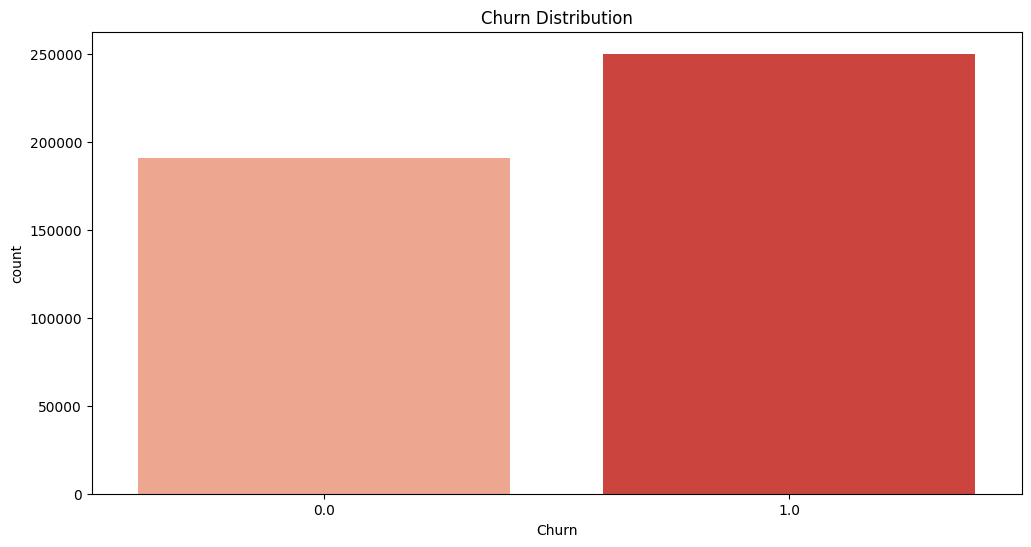

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', data=df , palette = "Reds" )
plt.title('Churn Distribution')
plt.show()

### Numerical Feature Distribution

/tmp/ipykernel_56181/3331292056.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True,palette =  "Greens")


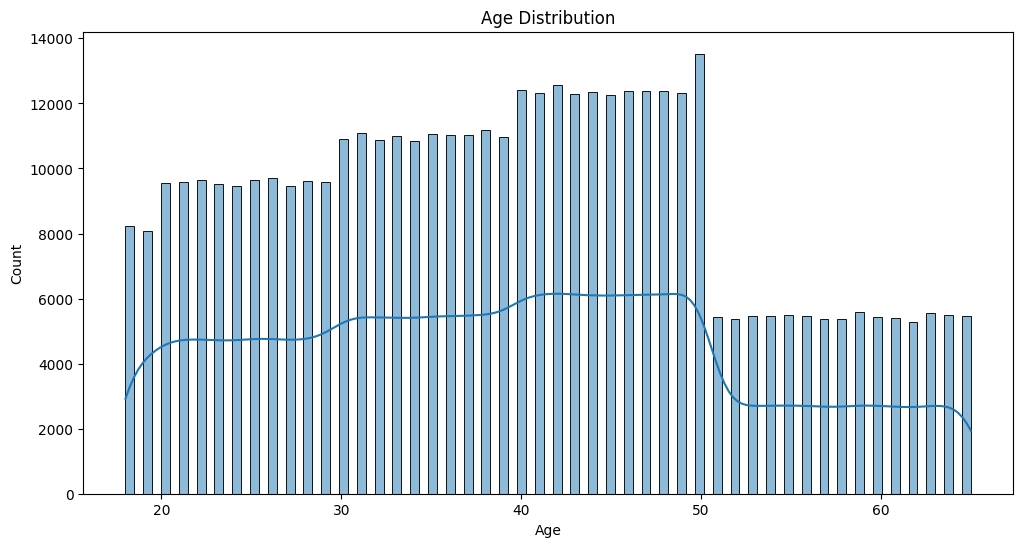

/tmp/ipykernel_56181/3331292056.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True,palette =  "Greens")


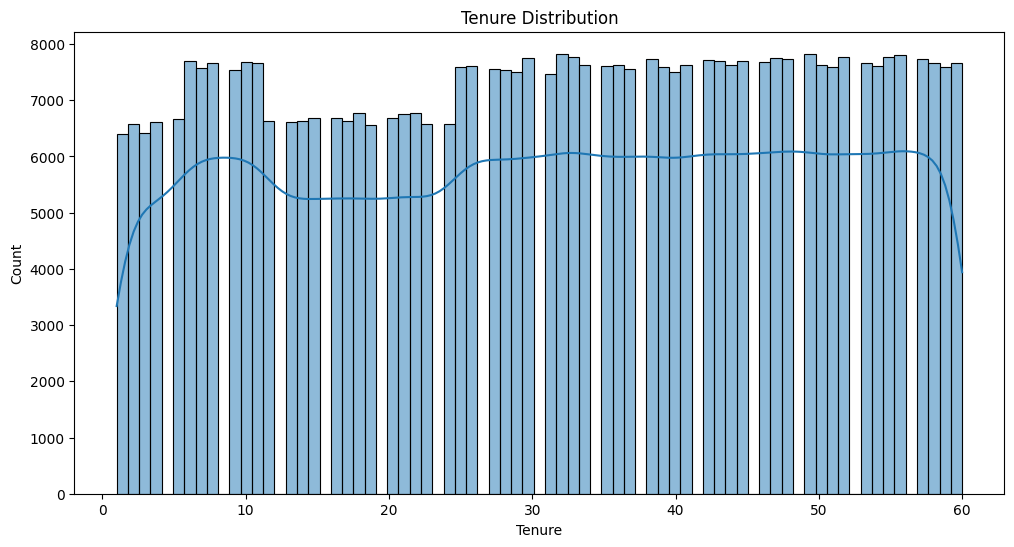

/tmp/ipykernel_56181/3331292056.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True,palette =  "Greens")


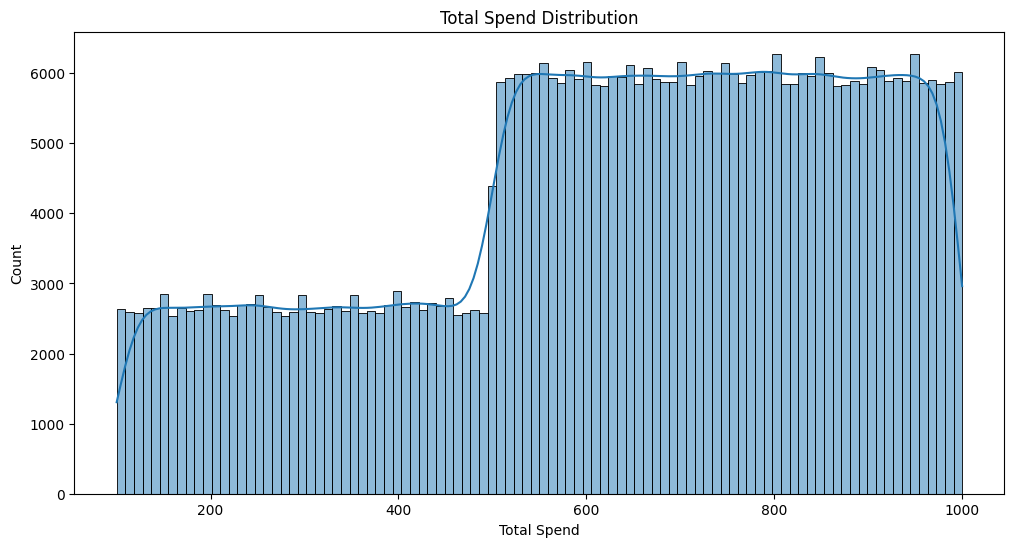

In [39]:
numerical_features = ['Age', 'Tenure', 'Total Spend']
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True,palette =  "Greens")
    plt.title(f'{feature} Distribution')
    plt.show()

### Churn by Categorical Features

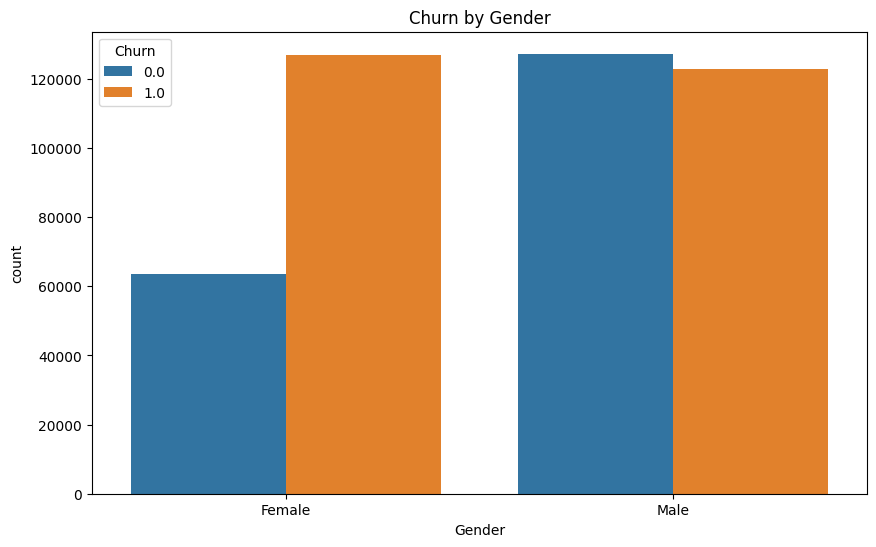

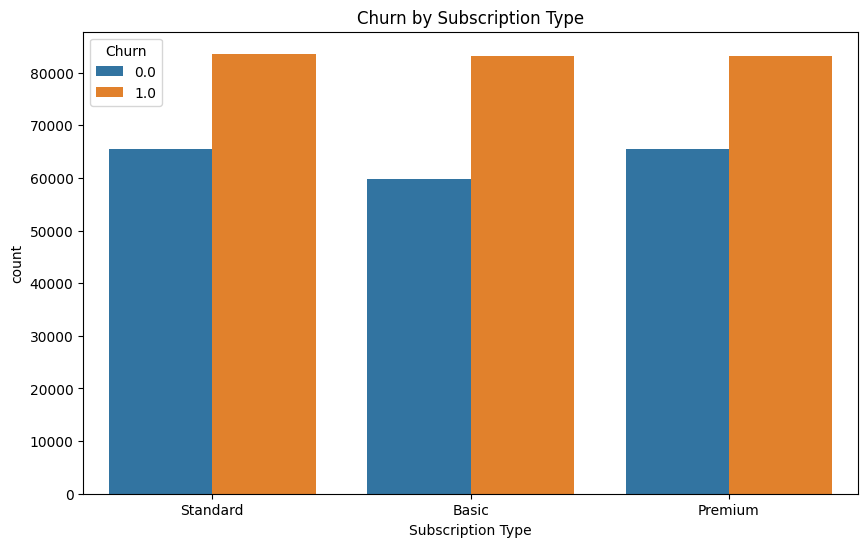

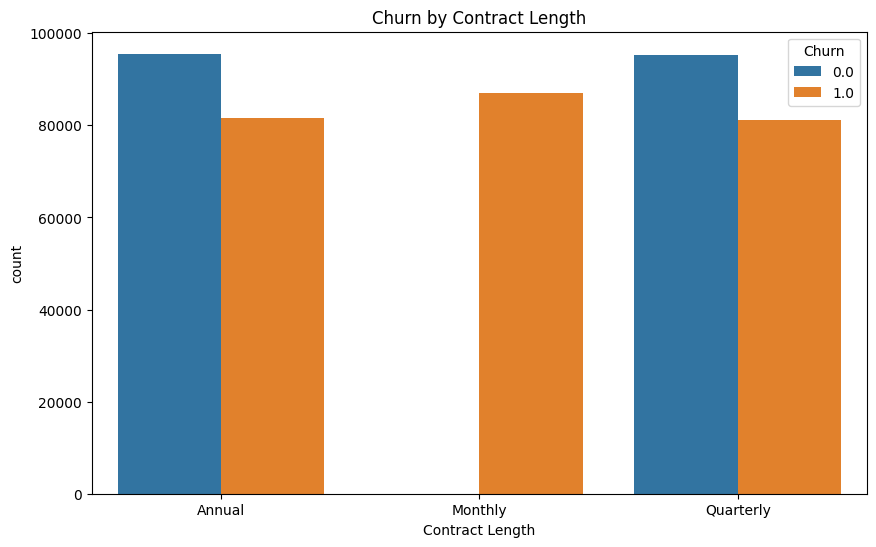

In [40]:
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.show()

### Correlation Matrix

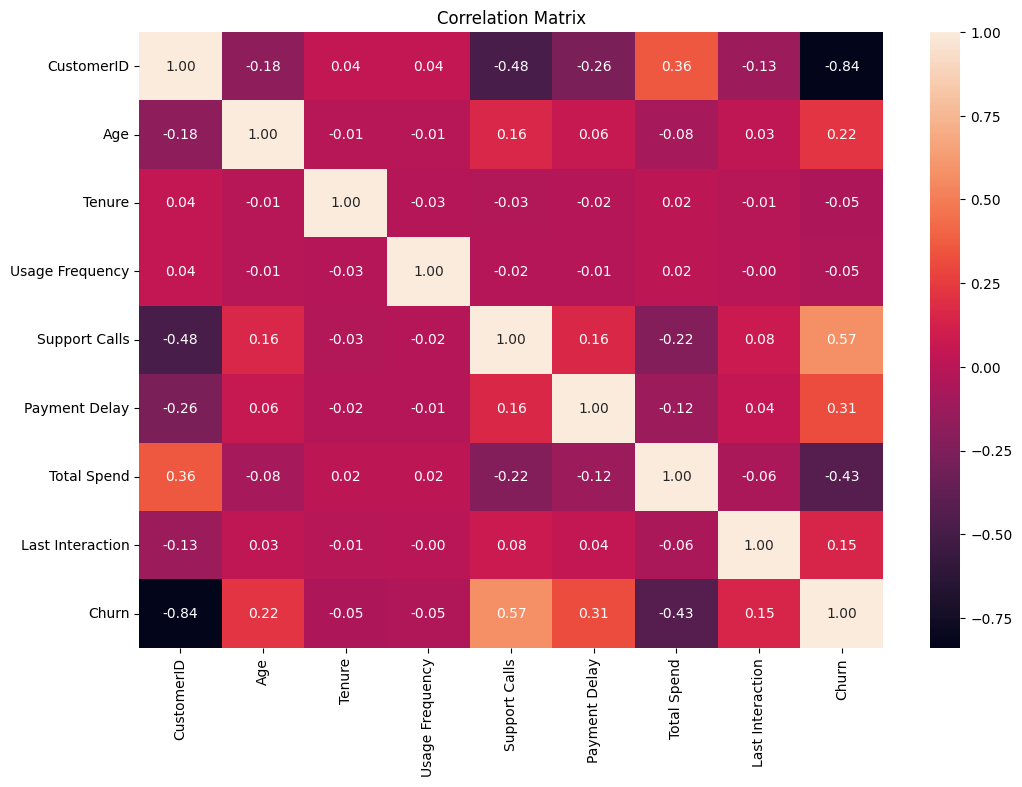

In [41]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [42]:
df.drop('CustomerID', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

## Model Training

In [43]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation

In [44]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9996143681876439
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



### Confusion Matrix

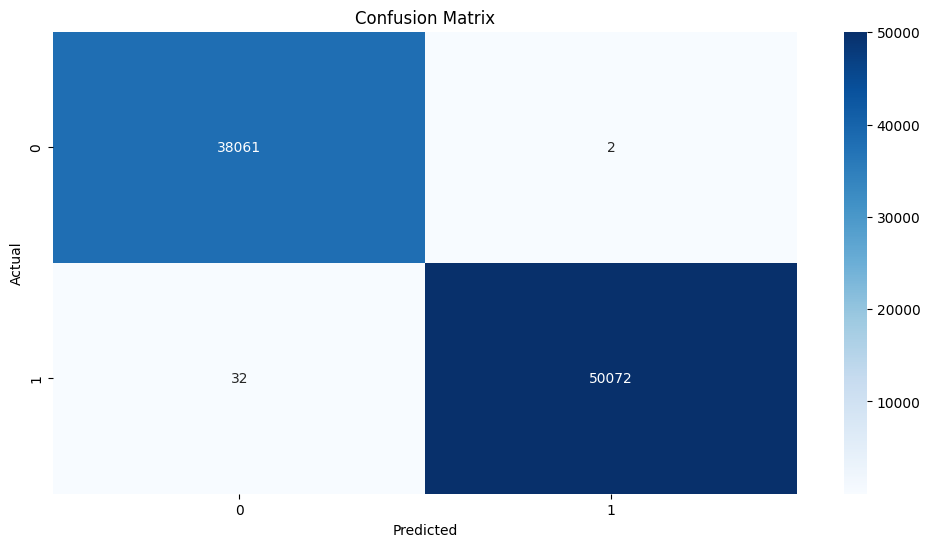

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Importance

/tmp/ipykernel_56181/883734079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index,palette ="magma_r")


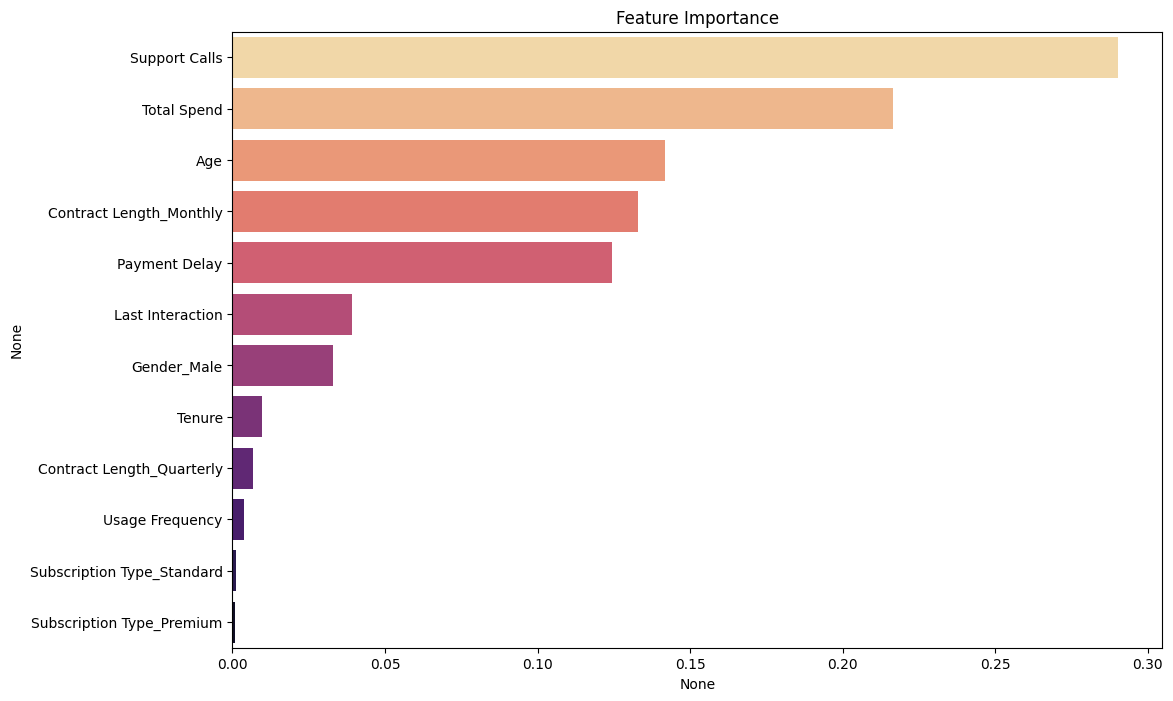

In [46]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index,palette ="magma_r")
plt.title('Feature Importance')
plt.show()

## Save the Model

In [47]:
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']